# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [6]:
# your code here

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel('Online Retail.xlsx')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
print('Shape:', df.shape)

# Data types and non-null counts
df.info()

Shape: (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
##removing missing values
## CustomerID is critical for customer-level analysis — drop rows where it’s missing if we analyze by customer.
## Description is useful for product-level analysis — drop rows with missing descriptions.
# Drop rows with missing CustomerID or Description
df_clean = df.dropna(subset=['CustomerID', 'Description'])


In [8]:
df_clean.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [9]:
df_clean.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
print('Duplicates:', df_clean.duplicated().sum())

Duplicates: 5225


In [13]:
df_clean = df_clean.drop_duplicates()

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [16]:
##Negative or zero quantities
## In retail, a negative quantity usually means a return or cancellation — we may want to:

##Keep them for refund analysis.Or remove them if we only want valid purchases.

df_clean = df_clean[df_clean['Quantity'] > 0]


In [17]:
##Negative or zero unit prices.These are almost always errors — drop them
df_clean = df_clean[df_clean['UnitPrice'] > 0]


In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [19]:
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

In [20]:
print('Original shape:', df.shape)
print('Cleaned shape:', df_clean.shape)


Original shape: (536641, 8)
Cleaned shape: (392692, 8)


In [21]:
df_clean.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [22]:
## create total price
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']


In [23]:
df_clean.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [24]:
# Make sure InvoiceDate is datetime (should already be)
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Year-Month for monthly trends
df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')

# Month number
df_clean['Month'] = df_clean['InvoiceDate'].dt.month

# Day of week name
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.day_name()

# Hour of day
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour


In [25]:
df_clean.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth,Month,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,12,Wednesday,8


In [27]:
##how many unique customers and product
print('Unique customers:', df_clean['CustomerID'].nunique())
print('Unique products:', df_clean['StockCode'].nunique())


Unique customers: 4338
Unique products: 3665


In [28]:
total_revenue = df_clean['TotalPrice'].sum()
print('Total Revenue: £{:.2f}'.format(total_revenue))
#Total sales revenue

Total Revenue: £8887208.89


In [29]:
##Average order value
order_totals = df_clean.groupby('InvoiceNo')['TotalPrice'].sum()
print('Average Order Value: £{:.2f}'.format(order_totals.mean()))


Average Order Value: £479.56


In [30]:
print('Average Quantity per Line Item: {:.2f}'.format(df_clean['Quantity'].mean()))

Average Quantity per Line Item: 13.12


In [31]:
country_revenue = df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
country_revenue.head(5)
##Check top 5 countries by revenue

Country
United Kingdom    7.285025e+06
Netherlands       2.854463e+05
EIRE              2.652625e+05
Germany           2.286784e+05
France            2.089343e+05
Name: TotalPrice, dtype: float64

In [33]:
product_revenue = df_clean.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)
product_revenue.head(5)
#Check top 5 products by total sales revenue

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
Name: TotalPrice, dtype: float64

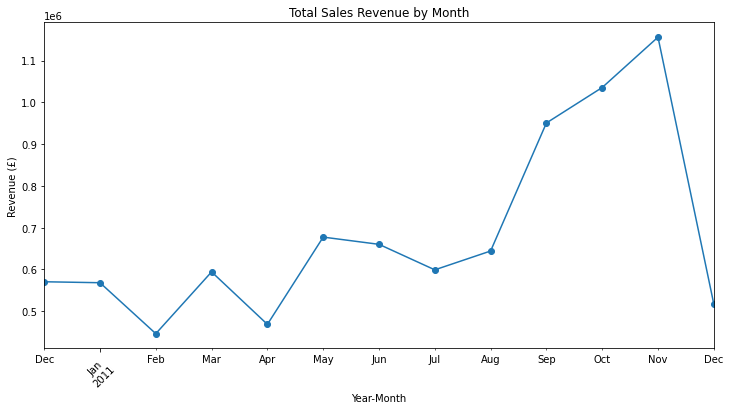

In [40]:
##Monthly Sales Trend
monthly_sales = df_clean.groupby('YearMonth')['TotalPrice'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Total Sales Revenue by Month')
plt.xlabel('Year-Month')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)
plt.show()

##November high revenue

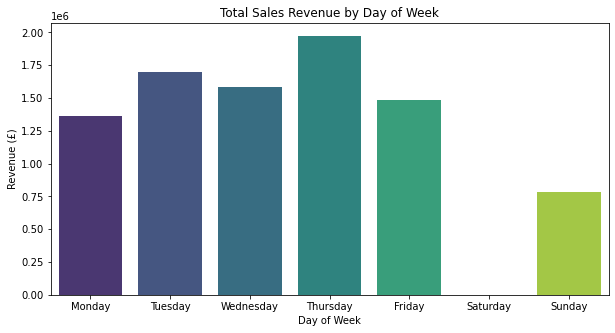

In [41]:
dow_sales = df_clean.groupby('DayOfWeek')['TotalPrice'].sum()
# To order properly:
dow_sales = dow_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10,5))
sns.barplot(x=dow_sales.index, y=dow_sales.values, palette='viridis')
plt.title('Total Sales Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Revenue (£)')
plt.show()
#Daily of Week Sales
#### Thrusday high revenue

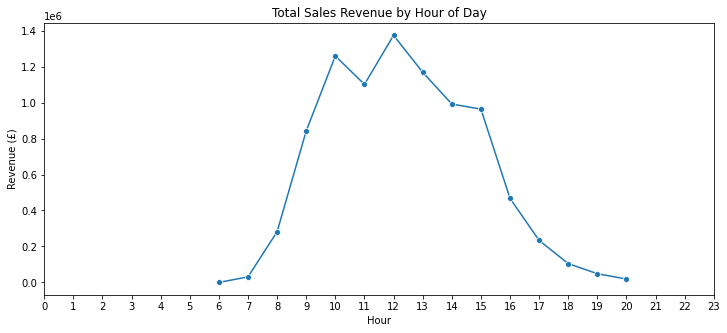

In [42]:
##Hourly Sales
hourly_sales = df_clean.groupby('Hour')['TotalPrice'].sum()

plt.figure(figsize=(12,5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.title('Total Sales Revenue by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Revenue (£)')
plt.xticks(range(0,24))
plt.show()
## within 10 AM to 12 PM there are peak sales

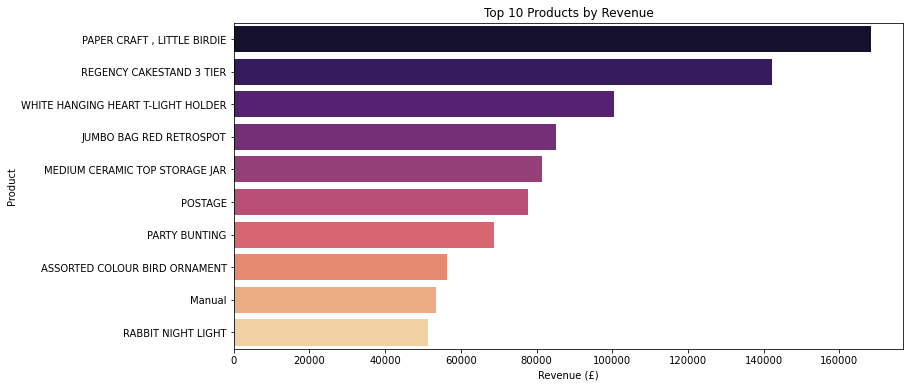

In [43]:
top_products = df_clean.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue (£)')
plt.ylabel('Product')
plt.show()
##top product by revenue
##paper craft, little birdie

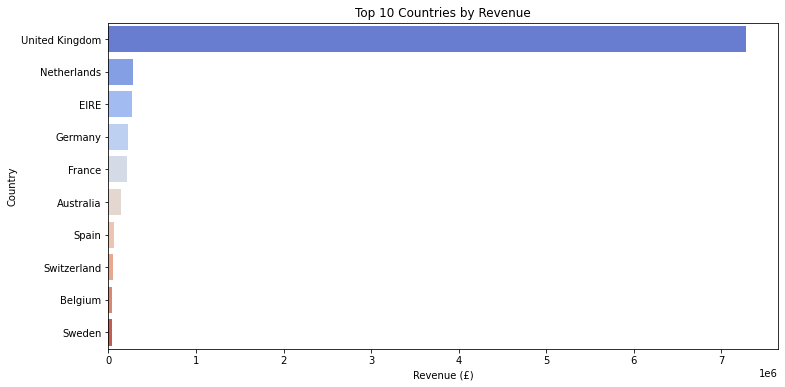

In [44]:
top_countries = df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Revenue (£)')
plt.ylabel('Country')
plt.show()
## United kingdom highest

**Key Insights from Your EDA**
---- Monthly Trend

Big spike in November

This likely reflects holiday shopping — Black Friday, Christmas prep.

Dip from August to September

Could be seasonal — late summer can be slower for some retail sectors.

Drop in December

This is common for online retail: last-minute shoppers often switch to in-store buying due to delivery time concerns.

---- Day of Week

Thursday is the busiest

Good to know for planning promotions, ads, or email campaigns.

Could align staff shifts or stock planning if you see this every week.

---- Hour of Day

Peak sales between 10 AM–12 PM

Many customers shop mid-morning — maybe during work breaks or before lunch.

Suggests email campaigns could be timed to hit inboxes early AM to catch the peak.

--- Top Products

Paper craft & Little Bardie are your top revenue drivers.

Focus on promoting these or bundling them with other products.

Ensure enough stock before peak seasons.

--- Top Country

United Kingdom dominates — expected since the business is UK-based.

If you want to grow internationally, check if other countries are worth targeting with localized promotions.

In [45]:
##spotting anomalies
# Largest single transaction
df_clean[df_clean['TotalPrice'] == df_clean['TotalPrice'].max()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth,Month,DayOfWeek,Hour
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6,2011-12,12,Friday,9


In [46]:
# Any extremely high quantities
df_clean[df_clean['Quantity'] > 1000]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth,Month,DayOfWeek,Hour
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299,United Kingdom,1003.20,2010-12,12,Thursday,16
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754,United Kingdom,518.40,2010-12,12,Thursday,17
4946,536830,21915,RED HARMONICA IN BOX,1400,2010-12-02 17:38:00,1.06,16754,United Kingdom,1484.00,2010-12,12,Thursday,17
6365,536890,17084R,ASSORTED INCENSE PACK,1440,2010-12-03 11:48:00,0.16,14156,EIRE,230.40,2010-12,12,Friday,11
16435,537659,22189,CREAM HEART CARD HOLDER,1008,2010-12-07 16:43:00,2.31,18102,United Kingdom,2328.48,2010-12,12,Tuesday,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
533812,581115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,2011-12-07 12:20:00,2.75,15195,United Kingdom,3861.00,2011-12,12,Wednesday,12
534952,581175,23084,RABBIT NIGHT LIGHT,1440,2011-12-07 15:16:00,1.79,14646,Netherlands,2577.60,2011-12,12,Wednesday,15
540070,581458,22197,POPCORN HOLDER,1500,2011-12-08 18:45:00,0.72,17949,United Kingdom,1080.00,2011-12,12,Thursday,18
540071,581459,22197,POPCORN HOLDER,1200,2011-12-08 18:46:00,0.72,17949,United Kingdom,864.00,2011-12,12,Thursday,18


In [47]:
##excluding outliers
df_no_outliers = df_clean[df_clean['Quantity'] < 1000]


In [48]:
df_no_outliers.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth,Month,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,12,Wednesday,8
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,2010-12,12,Wednesday,8
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,2010-12,12,Wednesday,8
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12,12,Wednesday,8
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12,12,Wednesday,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010-12,12,Wednesday,8


In [49]:
##how many unique customers and product
print('Unique customers:', df_no_outliers['CustomerID'].nunique())
print('Unique products:', df_no_outliers['StockCode'].nunique())



Unique customers: 4331
Unique products: 3663


In [50]:
total_revenue = df_no_outliers['TotalPrice'].sum()
print('Total Revenue: £{:.2f}'.format(total_revenue))
#Total sales revenue

Total Revenue: £8478156.38


In [51]:
##Average order value
order_totals = df_no_outliers.groupby('InvoiceNo')['TotalPrice'].sum()
print('Average Order Value: £{:.2f}'.format(order_totals.mean()))

Average Order Value: £458.50


In [55]:
print('Average Quantity per Line Item: {:.2f}'.format(df_no_outliers['Quantity'].mean()))

Average Quantity per Line Item: 12.27


In [56]:
country_revenue = df_no_outliers.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
country_revenue.head(5)
##Check top 5 countries by revenue

Country
United Kingdom    6.894205e+06
Netherlands       2.755238e+05
EIRE              2.650321e+05
Germany           2.286784e+05
France            2.089343e+05
Name: TotalPrice, dtype: float64

In [57]:
product_revenue = df_no_outliers.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)
product_revenue.head(5)
#Check top 5 products by total sales revenue

Description
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER     87566.20
JUMBO BAG RED RETROSPOT                79480.54
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
Name: TotalPrice, dtype: float64

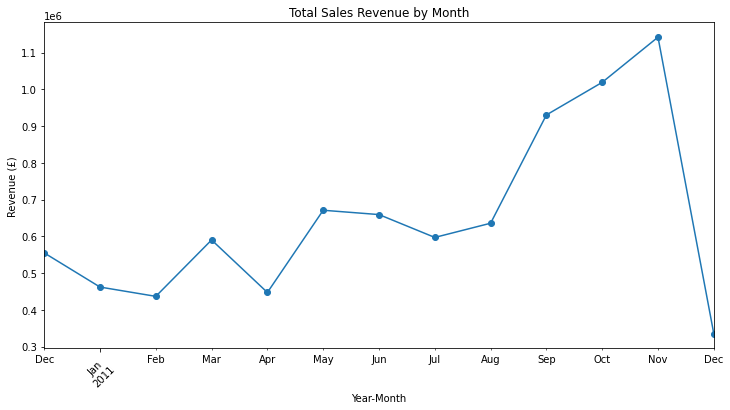

In [58]:
##Monthly Sales Trend
monthly_sales = df_no_outliers.groupby('YearMonth')['TotalPrice'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Total Sales Revenue by Month')
plt.xlabel('Year-Month')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)
plt.show()

##November high revenue

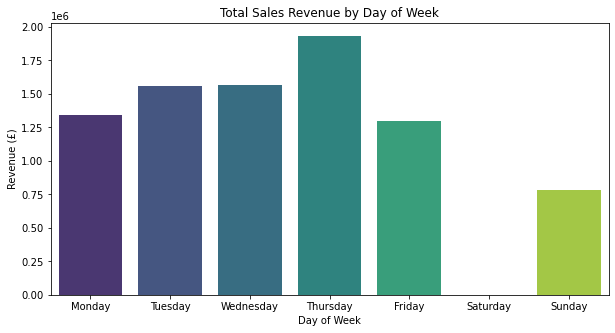

In [59]:
dow_sales = df_no_outliers.groupby('DayOfWeek')['TotalPrice'].sum()
# To order properly:
dow_sales = dow_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10,5))
sns.barplot(x=dow_sales.index, y=dow_sales.values, palette='viridis')
plt.title('Total Sales Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Revenue (£)')
plt.show()
#Daily of Week Sales
#### Thrusday high revenue

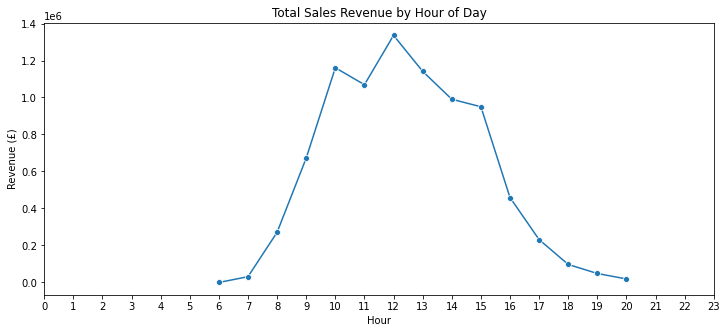

In [60]:
##Hourly Sales
hourly_sales = df_no_outliers.groupby('Hour')['TotalPrice'].sum()

plt.figure(figsize=(12,5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.title('Total Sales Revenue by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Revenue (£)')
plt.xticks(range(0,24))
plt.show()
## within 10 AM to 12 PM there are peak sales

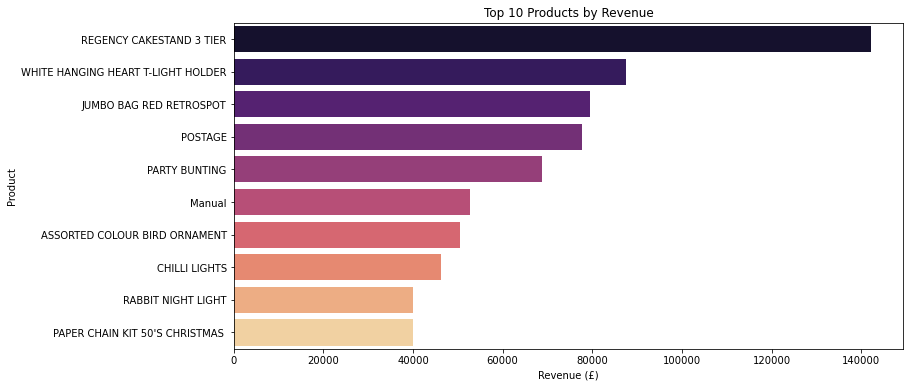

In [61]:
top_products = df_no_outliers.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue (£)')
plt.ylabel('Product')
plt.show()
##top product by revenue
##paper craft, little birdie

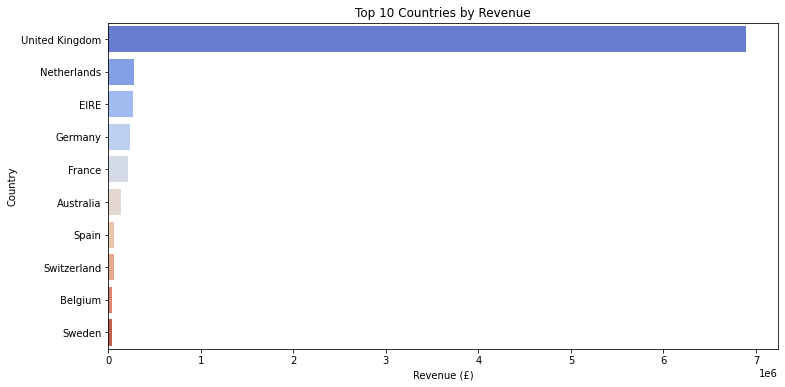

In [62]:
top_countries = df_no_outliers.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Revenue (£)')
plt.ylabel('Country')
plt.show()
## United kingdom highest

Sales Seasonality

Revenue spikes in November due to holiday shopping.

Dips in late summer, and slight drop in December likely due to in-store last-minute buyers.

✅ 2. Peak Shopping Times

Thursday is the busiest day.

Customers shop mostly between 6 AM–12 PM, peaking around 12 PM.

✅ 3. Top Sellers

Paper Craft, Little Birdie is the #1 product — but its top transaction is likely an outlier.

Other best-sellers include T-Light Holders and novelty gifts.

✅ 4. Key Markets

The UK is by far the largest market.


Stock & Promotions

Ensure popular products like craft items and T-light holders are well stocked ahead of November.

Consider bundles or discounts on top products to increase average basket size.

Marketing Timing

Schedule email promotions to reach customers early morning before peak buying time.

Push special Thursday promotions — align newsletters, social ads, discounts.

Data Hygiene

Implement better data validation to catch impossible quantities.

Review big orders manually to prevent reporting distortions.

International Growth

While the UK is dominant, explore growth in smaller international markets with targeted offers.